# 회귀 - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 2023
np.random.seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.2, random_state=seed
)

## 회귀모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([ 
    Dense(20, input_dim=8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)                        # 출력층에서는 활성화 함수를 사용하지 않음
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 126       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')    # metrics를 사용하지 않음

In [14]:
model_path = 'best_model.h5'
mc = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=20)

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200,
                 batch_size=256, callbacks=[es, mc])

Epoch 1/200
27/52 [==============>...............] - ETA: 0s - loss: 10403.9102 
Epoch 1: val_loss improved from inf to 36.27703, saving model to best_model.h5
52/52 [==============================] - 1s 6ms/step - loss: 5465.0757 - val_loss: 36.2770
Epoch 2/200
28/52 [===============>..............] - ETA: 0s - loss: 95.4279
Epoch 2: val_loss improved from 36.27703 to 26.11717, saving model to best_model.h5
52/52 [==============================] - 0s 4ms/step - loss: 104.5973 - val_loss: 26.1172
Epoch 3/200
25/52 [=============>................] - ETA: 0s - loss: 104.9076
Epoch 3: val_loss did not improve from 26.11717
52/52 [==============================] - 0s 3ms/step - loss: 101.9851 - val_loss: 145.3029
Epoch 4/200
30/52 [================>.............] - ETA: 0s - loss: 113.5204
Epoch 4: val_loss improved from 26.11717 to 15.96307, saving model to best_model.h5
52/52 [==============================] - 0s 3ms/step - loss: 108.3749 - val_loss: 15.9631
Epoch 5/200
25/52 [==========

- 모델 평가

In [16]:
best_model = load_model(model_path)
pred = best_model.predict(X_test)

129/129 [==============================] - 0s 1ms/step


In [17]:
pred.shape

(4128, 1)

In [18]:
dft = pd.DataFrame({'y_test': y_test, 'pred': pred.flatten()})
dft.head()

,y_test,pred
0,3.656,1.810380
1,2.010,2.637990
2,2.132,2.147939
3,0.986,1.161902
4,1.530,2.011868


In [19]:
# 회귀:
#   - 모델간 상대적 비교: MSE, RMSE
#   - 모델의 절대적 평가: R squared value (0 ~ 1), 다중(X 값이 여러개) 회귀에서는 정확하지 않음
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(0.788390419071117, 0.4268608136796498)

- 학습 과정 시각화

In [20]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

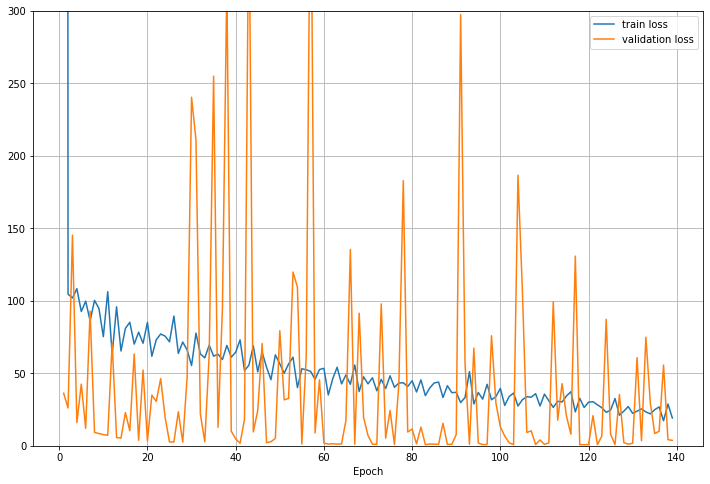

In [22]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0, 300)
plt.xlabel('Epoch')
plt.show()